<a href="https://colab.research.google.com/github/alejandrojeria-collab/PORTAFOLIO-CIENCIA-DE-DATOS/blob/main/Examen_portafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

## **Introducción**
Este proyecto tiene como objetivo predecir el nivel de Producto Interno Bruto (PIB) de distintos países utilizando un conjunto de indicadores económicos, sociales y demográficos obtenidos desde las bases de datos del Banco Mundial. Para ello, se emplea el paquete wbgapi en Python, el cual permite acceder de manera programática tanto a los datos como a sus metadatos mediante la API oficial del Banco Mundial, facilitando la descarga, exploración y selección de series e indicadores relevantes.

En particular, se considera la versión 1.0. de wbgapi, la cual incorporó mejoras orientadas a hacer la búsqueda y exploración de bases de datos más simple e interactiva, lo que resulta útil para estructurar un flujo de trabajo reproducible: desde la obtención y limpieza de datos en Google Colab, hasta la documentación y publicación del proyecto en GitHub.

# Revisión general del dataset

In [3]:
#Instalar biblioteca
%pip install wbgapi


In [4]:
import wbgapi as wb
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive')

import my_func as fn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, ConfusionMatrixDisplay,
                             cohen_kappa_score, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [5]:
import my_func as fn

#Extracción de datos desde la API del Banco Mundial

*   *A través de la API del Banco Mundial es posible acceder estadísticas relacionadas con el desarrollo económico, social y demográfico de los países.
En esta etapa se realiza la extracción inicial de datos, considerando un conjunto de 65 indicadores económicos relevantes para el estudio del Producto Interno Bruto (PIB)*

In [6]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}

In [7]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [8]:
# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [9]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

## Análisis exploratorio de datos

   



In [10]:
df_wb_raw.tail()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
192,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,9.933616,10.165600,67.144,64.617,62.099,8.4,75.0,NaN,NaN,44.7581
193,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,68.003820,57.193764,86.107,84.041,82.100,100.0,100.0,NaN,NaN,95.4456
194,DZA,Algeria,6.998184e+11,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,67.258843,44.258295,77.696,76.261,74.895,99.1,99.9,NaN,NaN,76.9081
195,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,77.031527,52.749937,81.446,79.602,77.728,72.5,95.2,81.7239,84.59,83.1356
196,AFG,Afghanistan,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,...,NaN,NaN,67.536,66.035,64.467,20.4,87.0,NaN,NaN,17.7089


Al revisar los primeros y últimos registros se observa que la extracción de datos contiene datos de paises y de áreas geográficas. Por lo tanto se procede a la limpieza de datos

In [11]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  197 non-null    object 
 1   Country                  197 non-null    object 
 2   NY.GDP.MKTP.PP.KD        197 non-null    float64
 3   SP.POP.GROW              197 non-null    float64
 4   SP.POP.TOTL              197 non-null    float64
 5   SP.POP.TOTL.FE.IN        197 non-null    float64
 6   SP.POP.TOTL.FE.ZS        197 non-null    float64
 7   SP.POP.TOTL.MA.IN        197 non-null    float64
 8   SP.POP.TOTL.MA.ZS        197 non-null    float64
 9   SP.URB.GROW              197 non-null    float64
 10  SP.URB.TOTL              197 non-null    float64
 11  SP.URB.TOTL.IN.ZS        197 non-null    float64
 12  SL.TLF.TOTL.FE.ZS        172 non-null    float64
 13  SL.TLF.TOTL.IN           172 non-null    float64
 14  SL.UEM.TOTL.FE.NE.ZS     1

In [12]:
import plotly.express as px
fig = px.choropleth(
    df_wb_raw,
    locations='country',
    color='NY.GDP.MKTP.PP.KD',
    hover_name='Country',
    projection='natural earth',
    title='PIB anual por paises',
    color_continuous_scale=px.colors.sequential.Blues  # Cambiar la escala de colores
)

# Ajustar el tamaño de la figura
fig.update_layout(
    width=1000,  # Ancho del gráfico
    height=600,  # Altura del gráfico
    title_font_size=24  # Tamaño de la fuente del título
)

# Mostrar el gráfico
fig.show()

##*Existen variables con un alto volumnen de datos faltantes. Usaremos la siguiente regla para el tratamiento de los mismos:*


*   Si NaN > 10% Se procede a eliminar la variable.
*   Si NaN < 10% Se procede a imputar datos.

In [13]:
(df_wb_raw.isna().sum() / len(df_wb_raw)>= 0.1).sum()

np.int64(34)

In [14]:
 lista = []
for i in df_wb_raw.columns:
  if df_wb_raw[i].isna().sum()/ len(df_wb_raw)>= 0.1:
    df_wb_raw.drop(i, axis = 1, inplace = True)
    lista.append(i)
print(f'Se eliminaron {len(lista)} columnas')

Se eliminaron 34 columnas


*Se identificaron y eliminaron 36 variables que presentaban más de un 10% de valores faltantes. Este criterio permite evitar una imputación excesiva en indicadores con baja disponibilidad de información. Con las variables restantes, que presentan un nivel reducido de datos faltantes, se procede a realizar la imputación para completar el conjunto de datos y continuar con el análisis.*

In [15]:
(df_wb_raw.isna().sum() / len(df_wb_raw)> 0).sum()

np.int64(16)

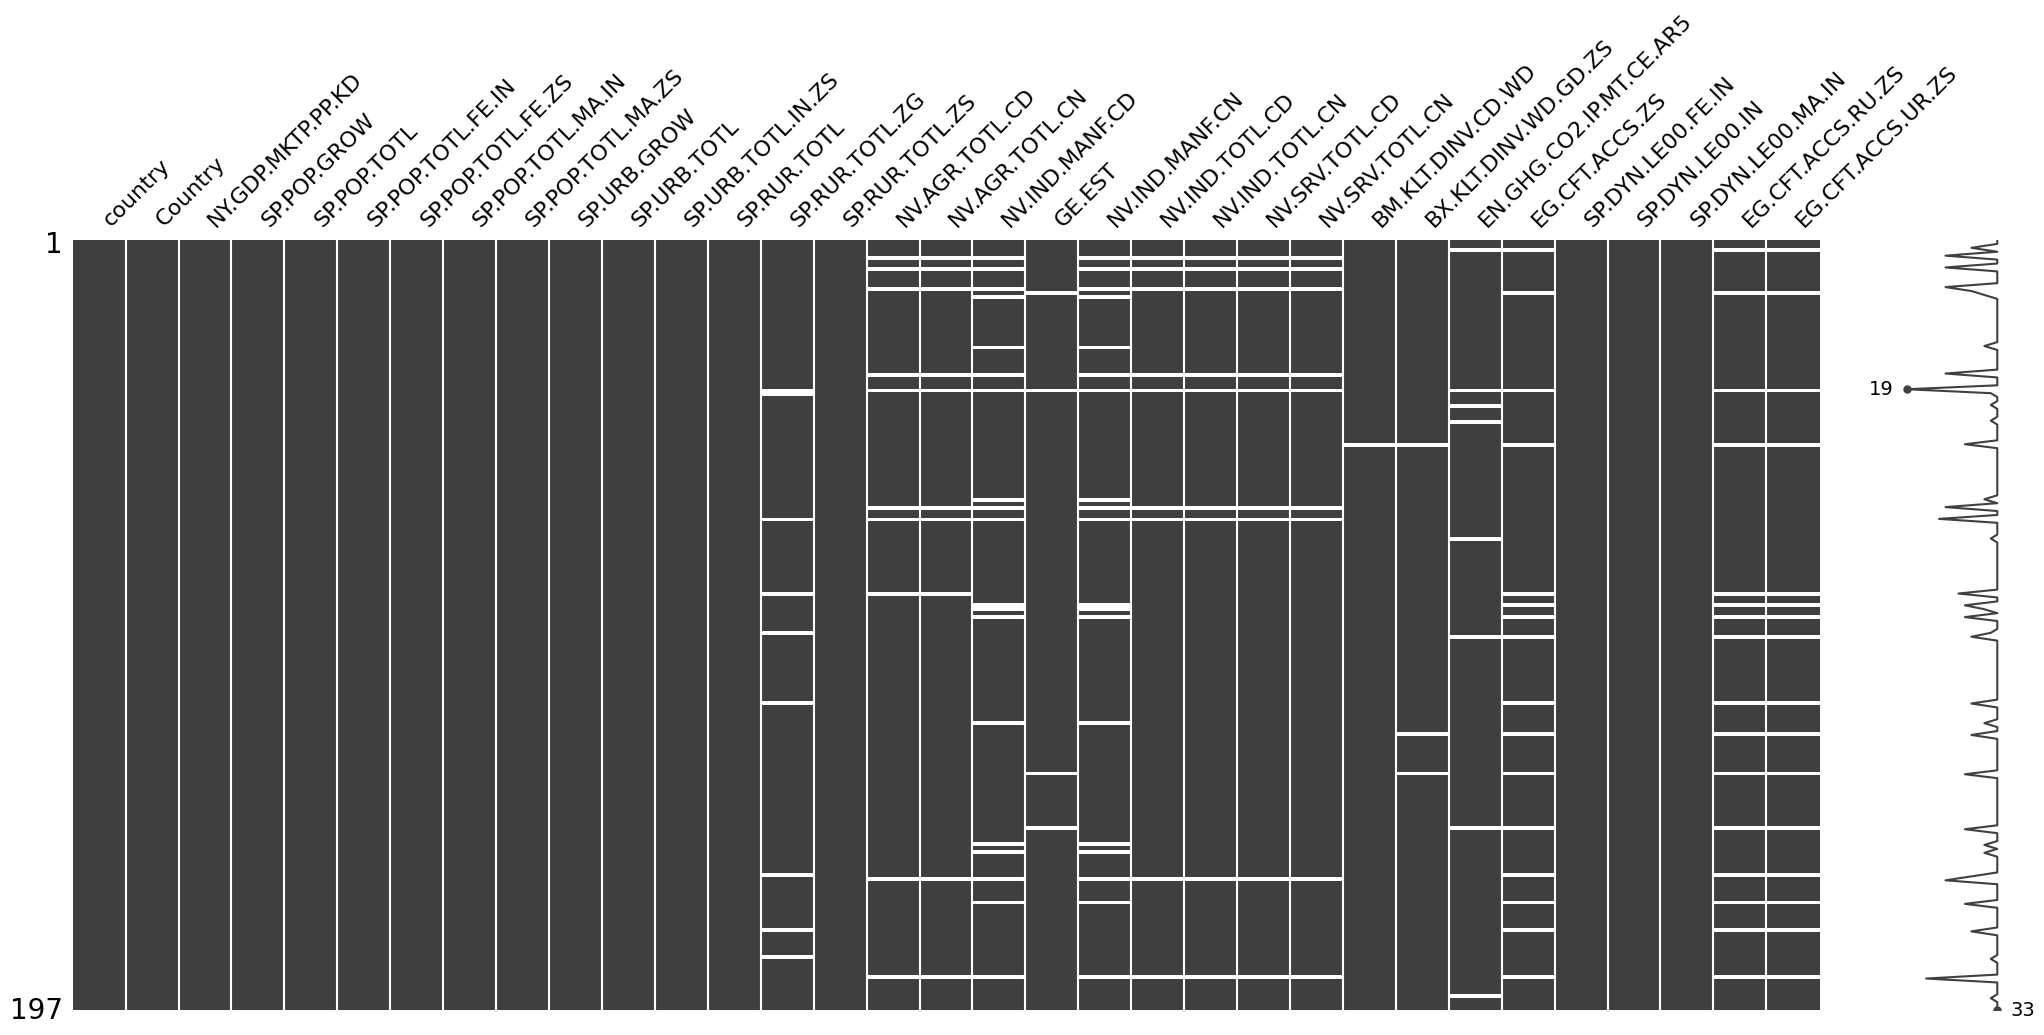

In [16]:
# Determinar el tipo de dato ausente
import missingno as msno
import matplotlib.pyplot as plt

# Visualización general
msno.matrix(df_wb_raw)
plt.show()

*El gráfico muestra el patrón de valores faltantes en el conjunto de datos, donde se observa que la mayoría de los indicadores presenta información completa para casi todas las observaciones. Los valores faltantes se concentran en un subconjunto reducido de variables específicas y no en observaciones completas, lo que indica que la pérdida de información es parcial y distribuida.*

In [17]:
# Guardar como indice la columna Country
df_wb_raw.index = df_wb_raw['Country']

In [18]:
# Eliminar columnas de texto
df_wb_raw= df_wb_raw.drop(columns = ['country','Country'])

In [19]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Zimbabwe to Afghanistan
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NY.GDP.MKTP.PP.KD        197 non-null    float64
 1   SP.POP.GROW              197 non-null    float64
 2   SP.POP.TOTL              197 non-null    float64
 3   SP.POP.TOTL.FE.IN        197 non-null    float64
 4   SP.POP.TOTL.FE.ZS        197 non-null    float64
 5   SP.POP.TOTL.MA.IN        197 non-null    float64
 6   SP.POP.TOTL.MA.ZS        197 non-null    float64
 7   SP.URB.GROW              197 non-null    float64
 8   SP.URB.TOTL              197 non-null    float64
 9   SP.URB.TOTL.IN.ZS        197 non-null    float64
 10  SP.RUR.TOTL              197 non-null    float64
 11  SP.RUR.TOTL.ZG           188 non-null    float64
 12  SP.RUR.TOTL.ZS           197 non-null    float64
 13  NV.AGR.TOTL.CD           187 non-null    float64
 14  NV.AGR.TOTL.CN  

# Imputación de datos
Se realizará a modo de prueba una imputación paramétrica a fin de aplicar algoritmo de reducción de dimensionalidad (IMPUTATIÓN POR MEDIA)

In [20]:
#crear copia
paises_wb = df_wb_raw.copy()

In [21]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = simple.fit_transform(paises_wb)
paises_wb = pd.DataFrame(imputer, columns = paises_wb.columns)

In [22]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} contienen registros.')


El dataFrame contiene 197 filas y 31 columnas, de las cuales 0 contienen registros.


# Imputación No Paramétrica (RandomForest)

In [23]:
# Activar el modo experimental del IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


In [24]:
# Instanciar objeto Iterative con RandomForest
imputer = IterativeImputer(
    estimator=RandomForestRegressor()
)

In [25]:
# Ajustar y transformar
df_imputed = imputer.fit_transform(df_wb_raw)

In [26]:
# Pasar a dataframe
df_rf_imputer = pd.DataFrame(df_imputed, columns = df_wb_raw.columns)

df_rf_imputer

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,...,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,6420625.0,39.291937,...,3.348446e+10,3.050000e+07,1.684321,0.963600,30.700,65.013,62.775,60.226,7.5000,77.000
1,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,9331708.0,45.028585,...,3.167001e+11,1.532150e+08,2.324653,1.290500,9.200,68.673,66.349,63.936,2.3000,16.800
2,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,4486873.0,86.857687,...,1.044720e+10,3.159065e+06,0.580098,0.678081,49.908,71.502,65.170,59.691,15.3885,74.087
3,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,38264181.0,38.129890,...,4.364896e+15,-1.550000e+09,4.264071,50.189800,98.700,79.264,74.588,69.877,98.7000,99.400
4,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,71340.0,22.265197,...,6.868044e+14,4.399200e+06,0.830619,0.001100,20.600,73.927,71.477,69.445,9.0000,52.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,25670362.0,69.851503,...,3.274279e+13,3.335616e+07,-1.977864,1.797700,50.200,67.144,64.617,62.099,8.4000,75.000
193,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,71816.0,88.820161,...,2.741340e+09,2.215940e+08,7.285975,0.061217,100.000,86.107,84.041,82.100,100.0000,100.000
194,6.998184e+11,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,34499817.0,74.732808,...,1.533987e+13,1.655830e+08,0.489819,16.388400,99.700,77.696,76.261,74.895,99.1000,99.900
195,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,1405259.0,58.210609,...,1.126932e+12,2.627767e+08,6.900370,0.818600,86.100,81.446,79.602,77.728,72.5000,95.200


In [27]:
(df_rf_imputer.isna().sum() / len(df_rf_imputer)> 0).sum()

np.int64(0)

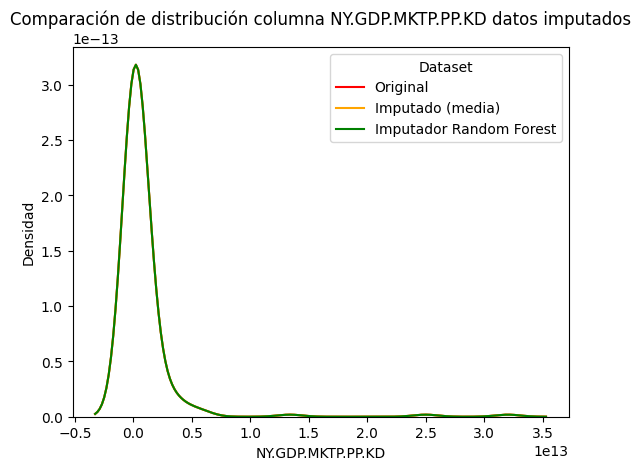

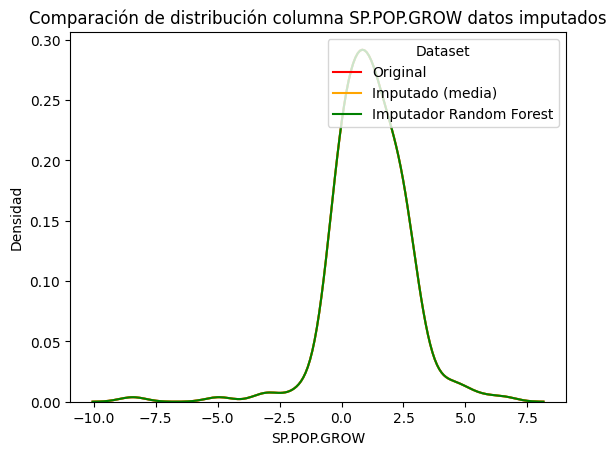

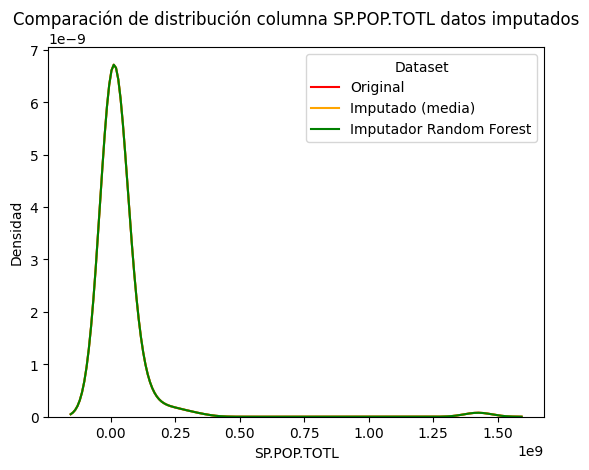

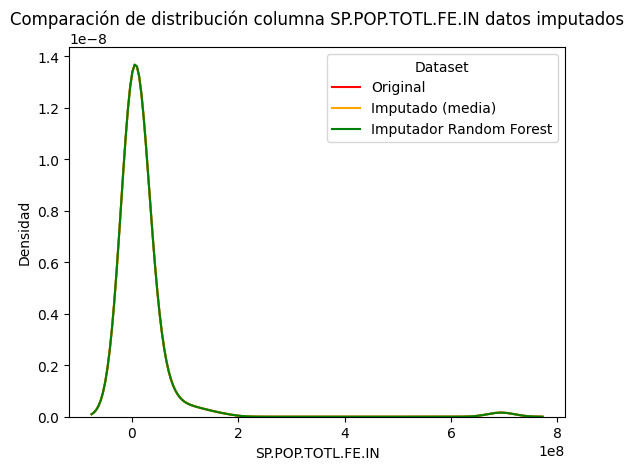

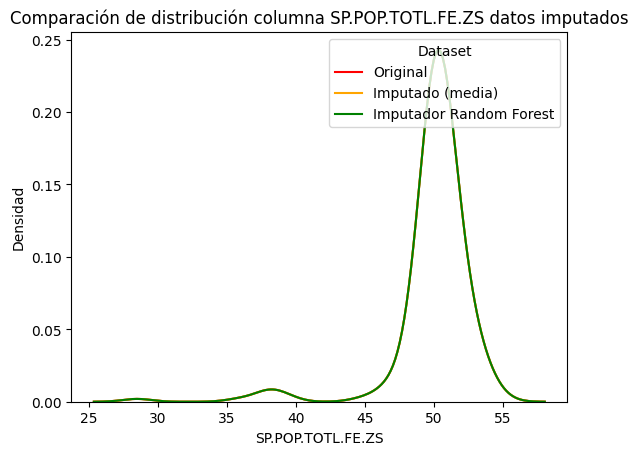

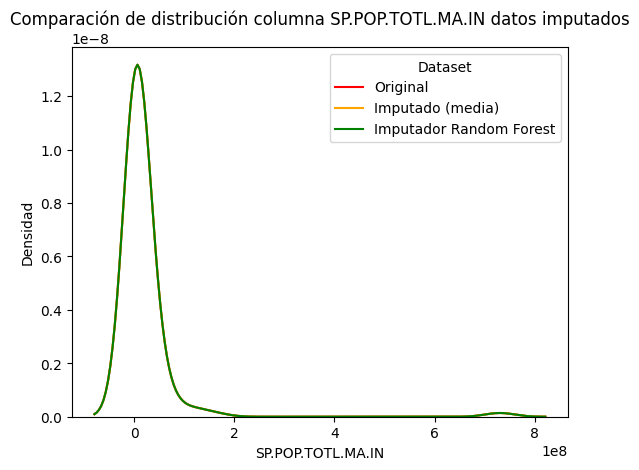

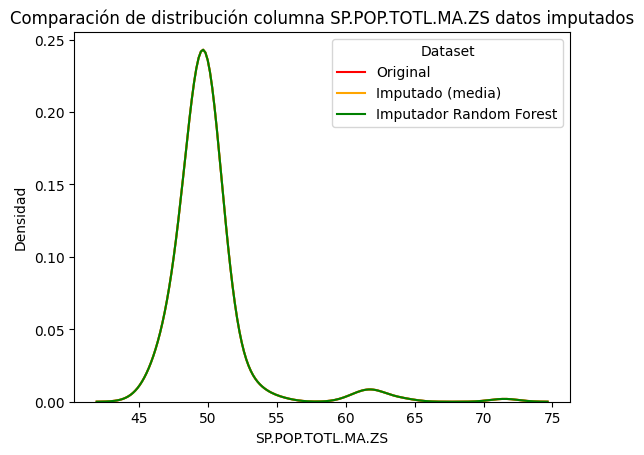

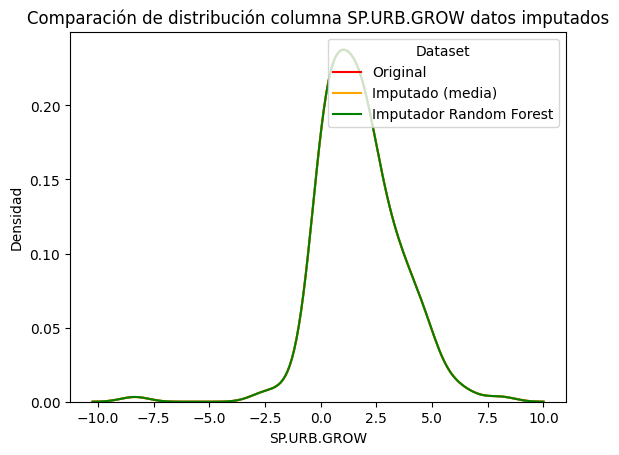

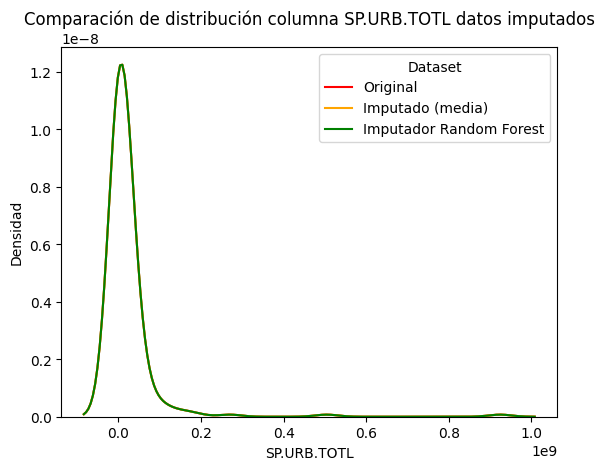

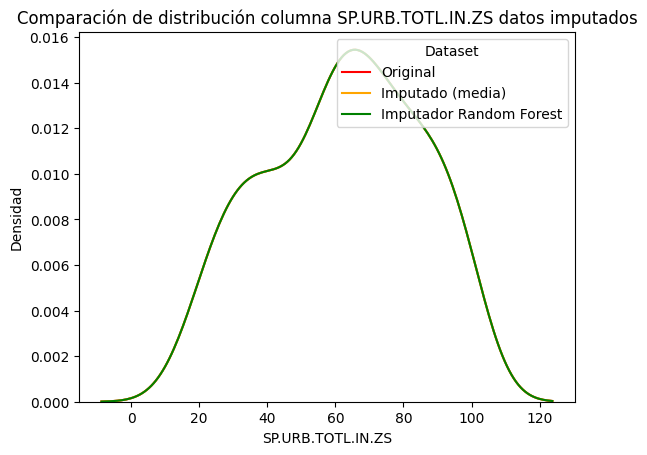

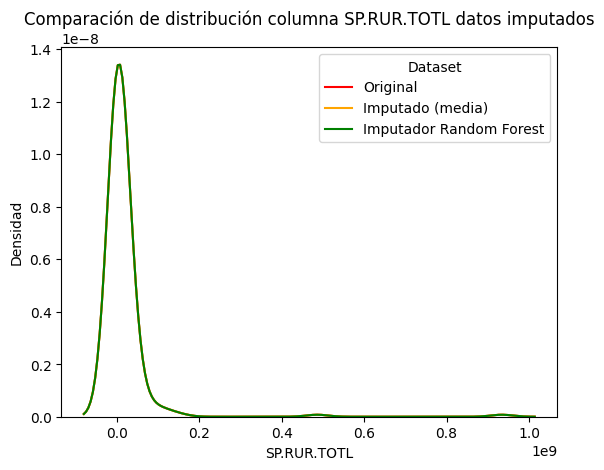

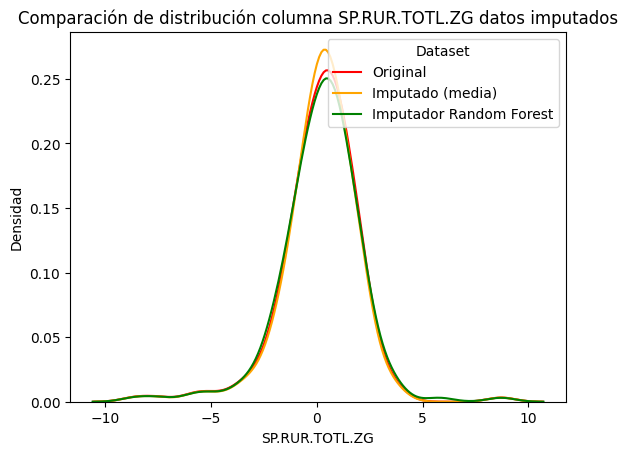

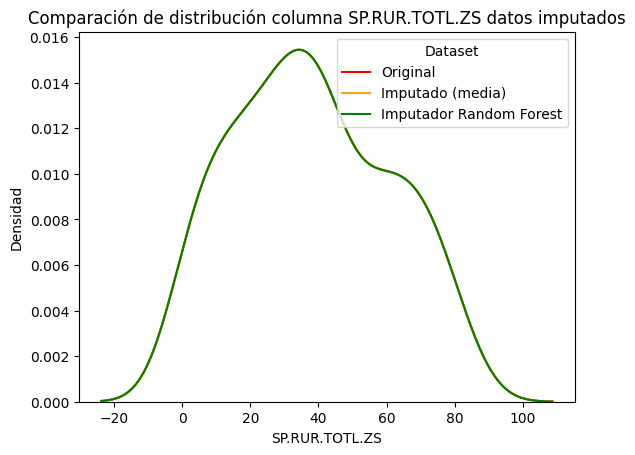

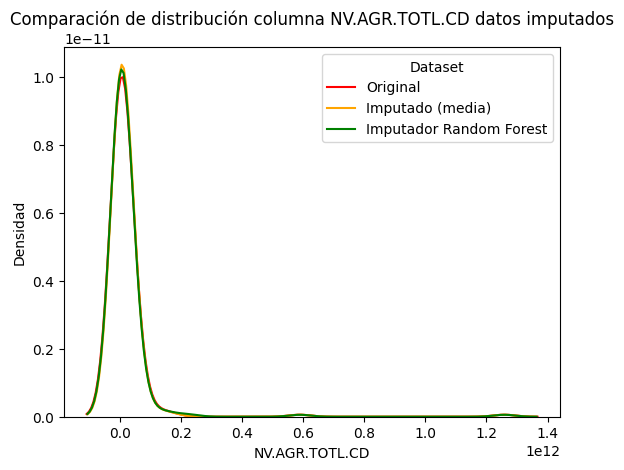

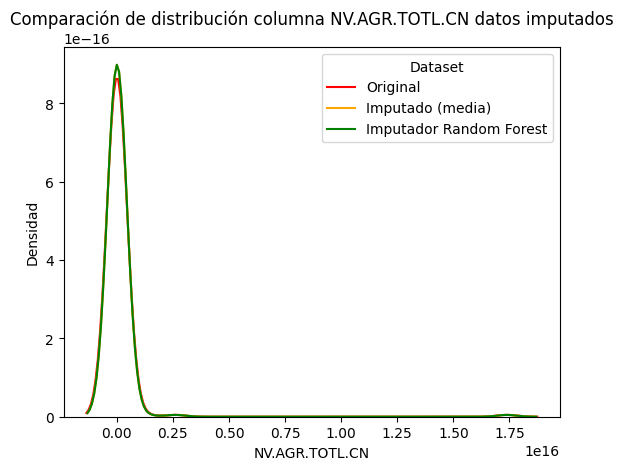

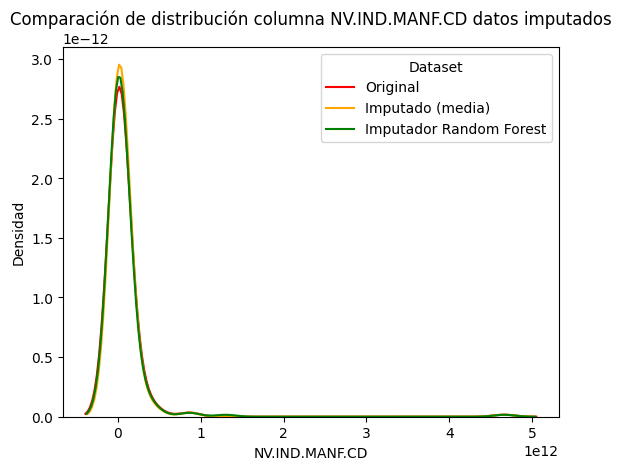

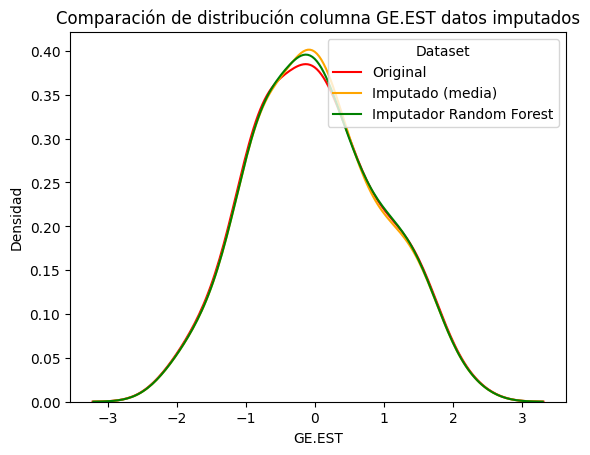

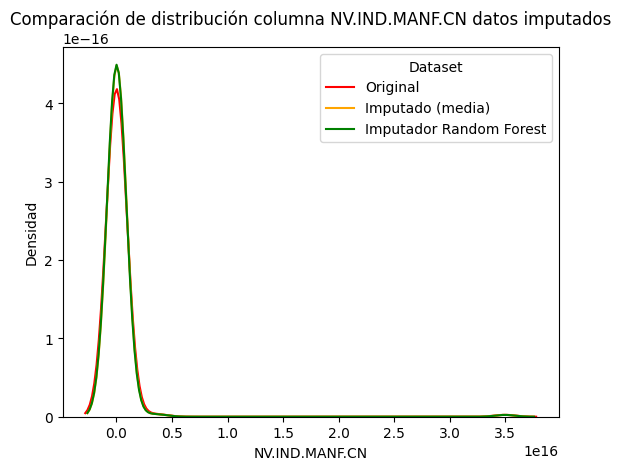

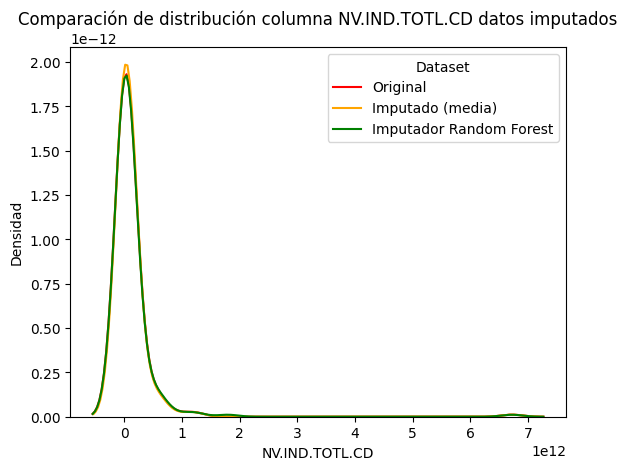

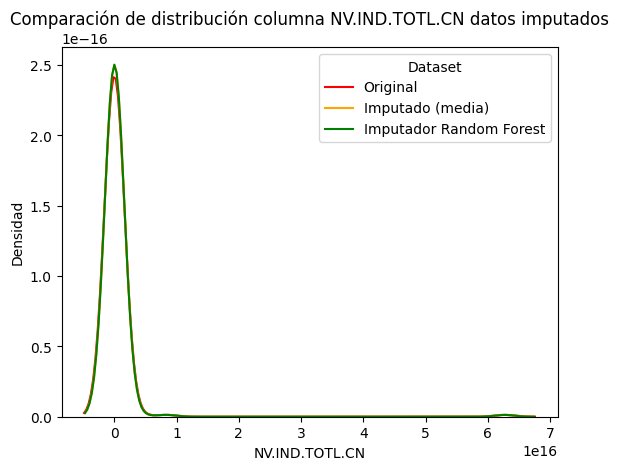

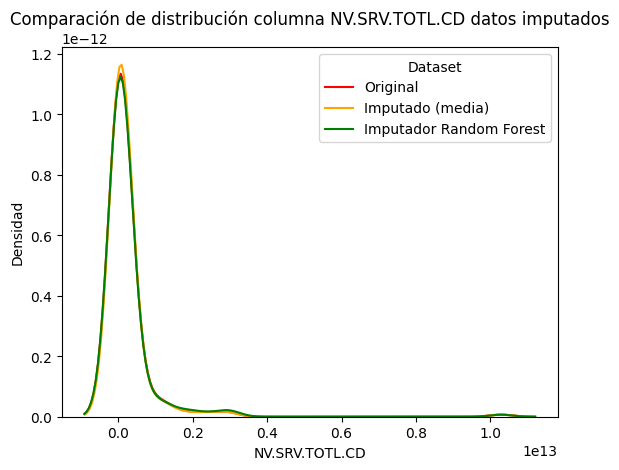

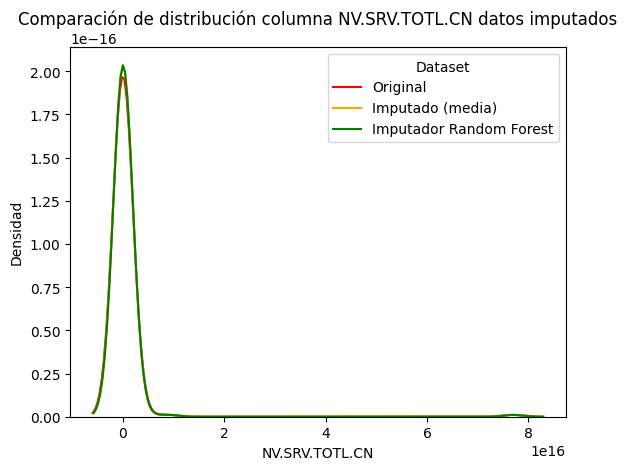

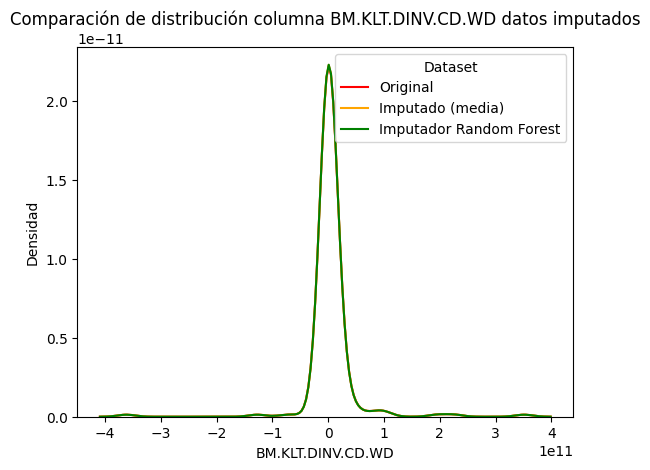

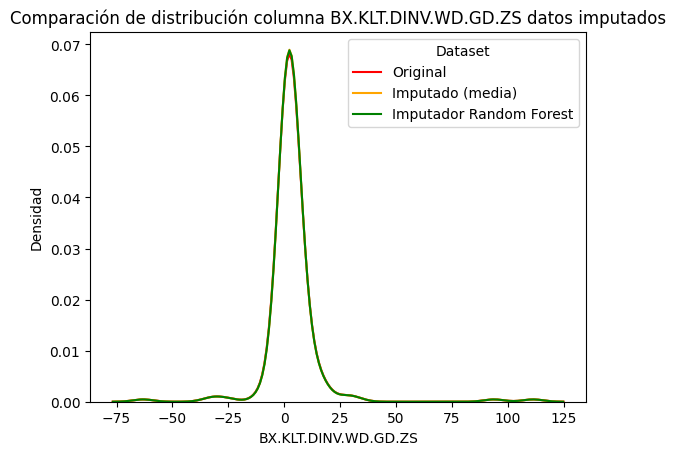

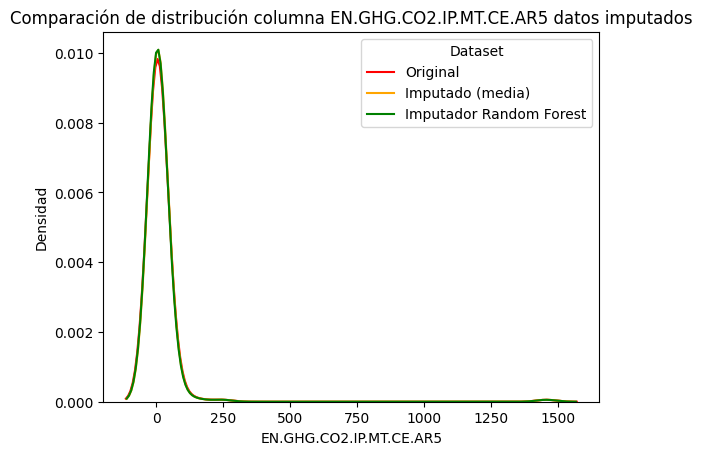

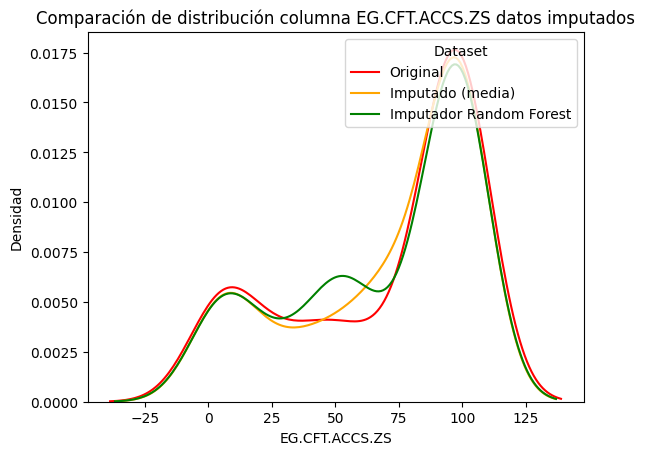

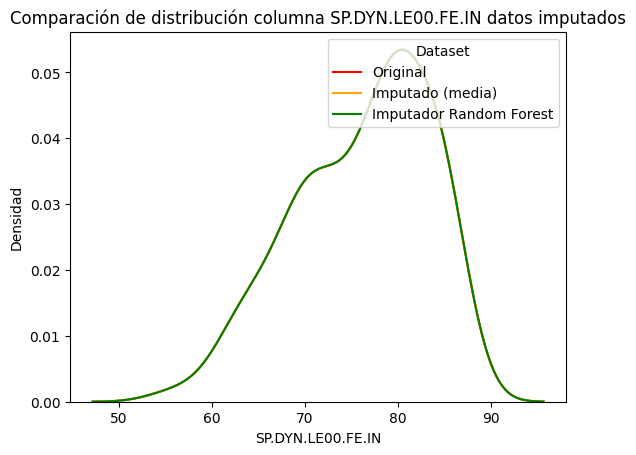

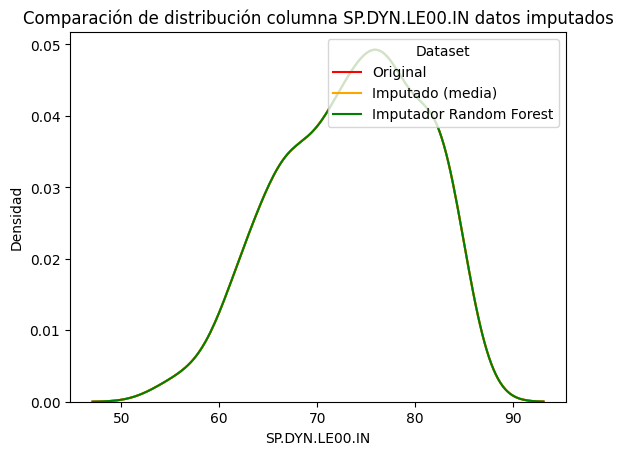

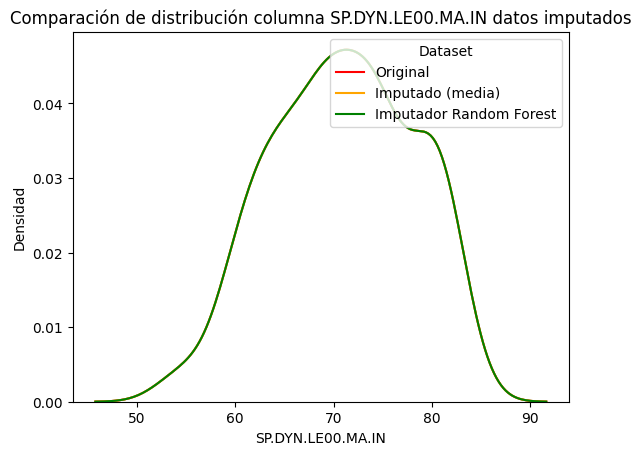

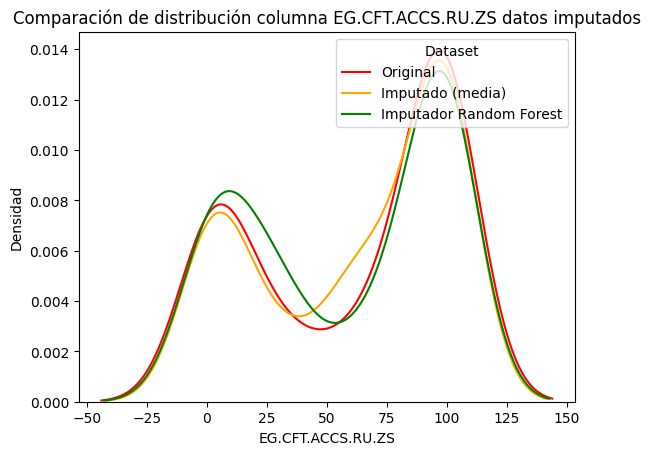

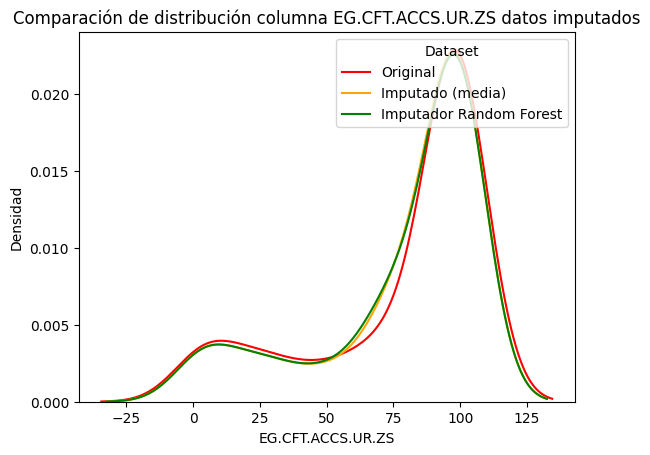

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas = df_wb_raw.columns

for col in columnas:

  # Gráfico KDE comparando dos datasets
  sns.kdeplot(data=df_wb_raw, x= col, label='Original', color='red')
  sns.kdeplot(data=paises_wb, x=col, label='Imputado (media)', color='orange')
  sns.kdeplot(data=df_rf_imputer, x=col, label='Imputador Random Forest', color='green')

  # Agregar leyenda
  plt.legend(title='Dataset', loc='upper right')


  # Personalizar el gráfico
  plt.title(f"Comparación de distribución columna {col} datos imputados")
  plt.xlabel(col)
  plt.ylabel("Densidad")

  plt.show()

*Para la imputación de valores faltantes se empleó Random Forest, ya que es un método no paramétrico capaz de capturar relaciones no lineales e interacciones entre múltiples indicadores sin requerir supuestos fuertes de distribución. Además, tiende a ser más robusto que imputaciones simples (media/mediana) al aprovechar la información conjunta del resto de variables para predecir valores faltantes, manteniendo mejor la estructura multivariada del dataset*

In [29]:
df_rf_imputer.describe().T


,count,mean,std,min,25%,50%,75%,max
NY.GDP.MKTP.PP.KD,197.0,8.426277e+11,3.137449e+12,5.705451e+07,2.573230e+10,8.526678e+10,4.680949e+11,3.200488e+13
SP.POP.GROW,197.0,1.133636e+00,1.557045e+00,-8.423008e+00,2.815125e-01,1.103287e+00,2.057728e+00,6.527050e+00
SP.POP.TOTL,197.0,4.007937e+07,1.488694e+08,9.816000e+03,1.370286e+06,7.305659e+06,2.969461e+07,1.438070e+09
SP.POP.TOTL.FE.IN,197.0,1.991876e+07,7.271089e+07,4.795000e+03,6.865120e+05,3.591018e+06,1.423210e+07,6.961863e+08
SP.POP.TOTL.FE.ZS,197.0,4.997332e+01,3.001015e+00,2.848374e+01,4.964984e+01,5.033167e+01,5.119441e+01,5.492088e+01
SP.POP.TOTL.MA.IN,197.0,2.016061e+07,7.617181e+07,5.021000e+03,6.776020e+05,3.510290e+06,1.427923e+07,7.418833e+08
SP.POP.TOTL.MA.ZS,197.0,5.002668e+01,3.001015e+00,4.507912e+01,4.880559e+01,4.966833e+01,5.035016e+01,7.151626e+01
SP.URB.GROW,197.0,1.716479e+00,1.821372e+00,-8.348151e+00,4.434424e-01,1.506784e+00,2.694855e+00,8.105580e+00
SP.URB.TOTL,197.0,2.292653e+07,8.039378e+07,6.283000e+03,8.398140e+05,4.439472e+06,1.564149e+07,9.244403e+08
SP.URB.TOTL.IN.ZS,197.0,6.215482e+01,2.276925e+01,1.505810e+01,4.324969e+01,6.358237e+01,7.957030e+01,1.000000e+02


*Se generó una tabla de estadísticas descriptivas para resumir la tendencia central y dispersión de los indicadores, lo que permite caracterizar la base de datos antes de la modelación.*

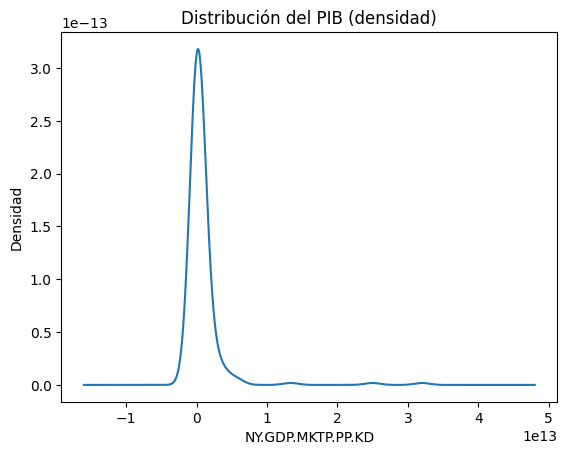

In [30]:
import matplotlib.pyplot as plt

plt.figure()
df_rf_imputer['NY.GDP.MKTP.PP.KD'].plot(kind="density")
plt.xlabel("NY.GDP.MKTP.PP.KD")
plt.ylabel("Densidad")
plt.title("Distribución del PIB (densidad)")
plt.show()




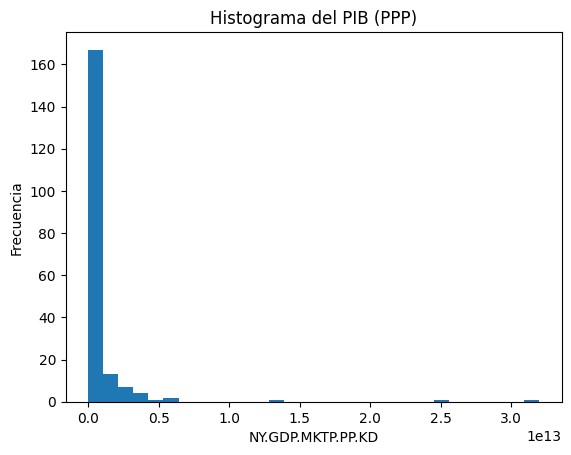

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_rf_imputer['NY.GDP.MKTP.PP.KD'], bins=30)
plt.xlabel('NY.GDP.MKTP.PP.KD')
plt.ylabel('Frecuencia')
plt.title('Histograma del PIB (PPP)')
plt.show()



*Tanto el histograma como el gráfico de densidad muestran que la distribución del PIB es asimétrica, con una alta concentración de países en niveles bajos de PIB y una cola larga hacia valores elevados. Esto refleja la marcada heterogeneidad económica entre países, donde un número reducido de economías concentra valores de PIB mayores. Ambos gráficos son consistentes entre sí*.

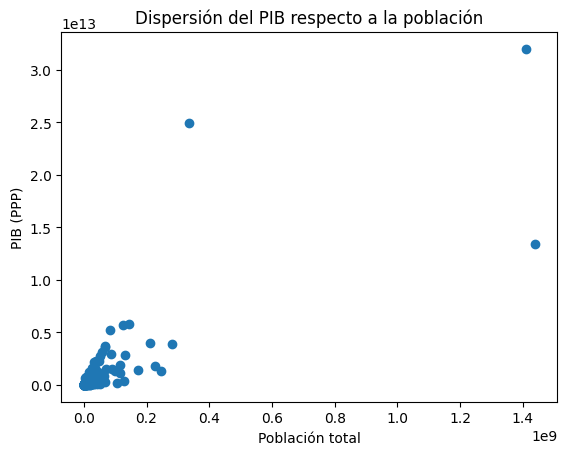

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df_rf_imputer['SP.POP.TOTL'],df_rf_imputer['NY.GDP.MKTP.PP.KD'] )
plt.xlabel("Población total")
plt.ylabel("PIB (PPP)")
plt.title("Dispersión del PIB respecto a la población")
plt.show()


In [33]:
print(f"El dataset tiene {df_rf_imputer.shape[0]} países, {df_rf_imputer.shape[1]} variables y {df_rf_imputer.shape[0]*(df_rf_imputer.shape[1])} observaciones")

El dataset tiene 197 países, 31 variables y 6107 observaciones


*El gráfico de dispersión muestra una relación positiva entre el PIB y la población total, aunque con una alta dispersión entre países. Se observan algunos valores extremos correspondientes a economías muy grandes.*

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


#Reducción de Dimensionalidad


*   *La reducción de dimensionalidad consiste en transformar un conjunto amplio de variables originales en un número menor de componentes que concentran la mayor parte de la información relevante. Este procedimiento permite simplificar la base de datos, reducir redundancias entre variables altamente correlacionadas y facilitar el análisis y la modelación, manteniendo al mismo tiempo la mayor proporción posible de la variabilidad original de los datos.*


In [34]:
df_rf_imputer.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,...,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,6420625.0,39.291937,...,3.348446e+10,3.050000e+07,1.684321,0.963600,30.700,65.013,62.775,60.226,7.5000,77.000
1,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,9331708.0,45.028585,...,3.167001e+11,1.532150e+08,2.324653,1.290500,9.200,68.673,66.349,63.936,2.3000,16.800
2,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,4486873.0,86.857687,...,1.044720e+10,3.159065e+06,0.580098,0.678081,49.908,71.502,65.170,59.691,15.3885,74.087
3,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,38264181.0,38.129890,...,4.364896e+15,-1.550000e+09,4.264071,50.189800,98.700,79.264,74.588,69.877,98.7000,99.400
4,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,71340.0,22.265197,...,6.868044e+14,4.399200e+06,0.830619,0.001100,20.600,73.927,71.477,69.445,9.0000,52.300


# Se deifne la variable x y la variable y


In [35]:
y = df_rf_imputer['NY.GDP.MKTP.PP.KD']
X = df_rf_imputer.drop(columns='NY.GDP.MKTP.PP.KD')



In [36]:
# Importar biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2


In [37]:
# Escalar datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

# Matriz de correlaciones

* Correlación de Pearson


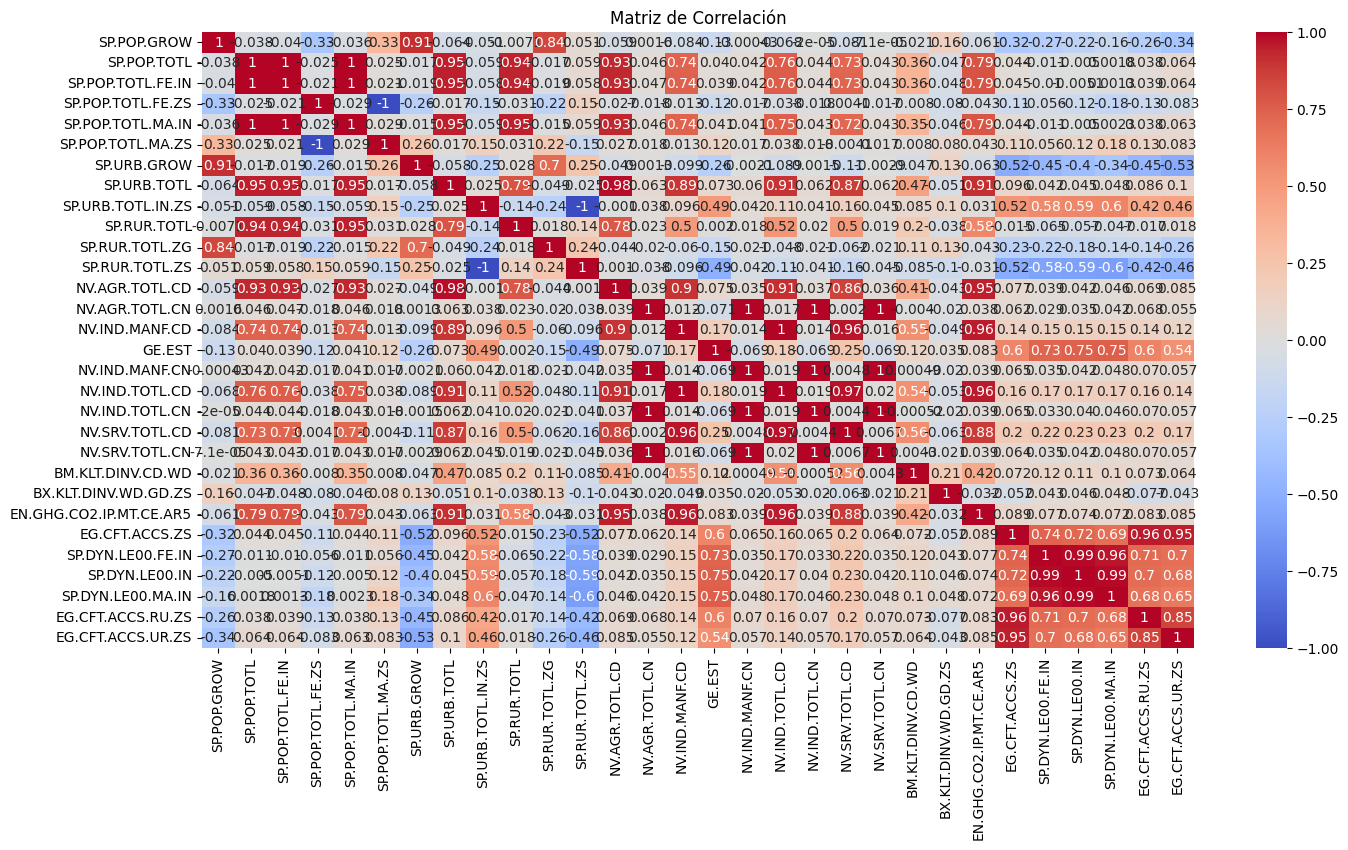

In [38]:
corr = X_std.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [39]:
pca = PCA()
pca.fit(X_std)

pca.explained_variance_ratio_

array([3.04370865e-01, 2.26184696e-01, 1.33382880e-01, 9.99559221e-02,
       5.11603227e-02, 4.26242699e-02, 3.63188240e-02, 3.29878166e-02,
       2.55368417e-02, 1.79288805e-02, 1.23473377e-02, 6.48028104e-03,
       4.49151023e-03, 2.85529693e-03, 9.76484095e-04, 8.26086568e-04,
       7.19363416e-04, 3.66612465e-04, 2.21678074e-04, 1.34357681e-04,
       8.93611257e-05, 2.49902366e-05, 6.93841097e-06, 3.26862005e-06,
       2.91385355e-06, 2.20069402e-06, 9.15391284e-31, 6.00265691e-32,
       1.67689890e-33, 1.42700224e-33])

*Se aplicó el Análisis de Componentes Principales (PCA) al conjunto de variables estandarizadas. El método identifica combinaciones lineales ortogonales de las variables originales que maximizan la varianza explicada.*

In [40]:
np.sum([2.97580823e-01, 2.39793582e-01, 1.08157372e-01, 1.06109907e-01,
       5.36858602e-02])

np.float64(0.8053275442)

In [41]:
# Seleccionar 5 componentes
pca_5 = PCA(n_components=5)
X_std_pca = pca_5.fit_transform(X_std)

X_std_pca = pd.DataFrame(X_std_pca, columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'])
X_std_pca.head()




,CP1,CP2,CP3,CP4,CP5
0,-1.689593,-3.218164,0.038098,-0.882270,-0.284471
1,-1.774018,-3.462002,0.036737,0.696561,-0.776844
2,-1.307163,-1.428625,0.021132,0.329686,-0.742613
3,1.009107,0.117322,1.588044,-0.735492,0.930906
4,-1.603161,-2.442747,0.178529,0.497434,0.158671


*Se seleccionaron 5 componentes principales porque en conjunto explican aproximadamente el 80.5% de la varianza total,ubicándose dentro del rango recomendado (70%–90%).*


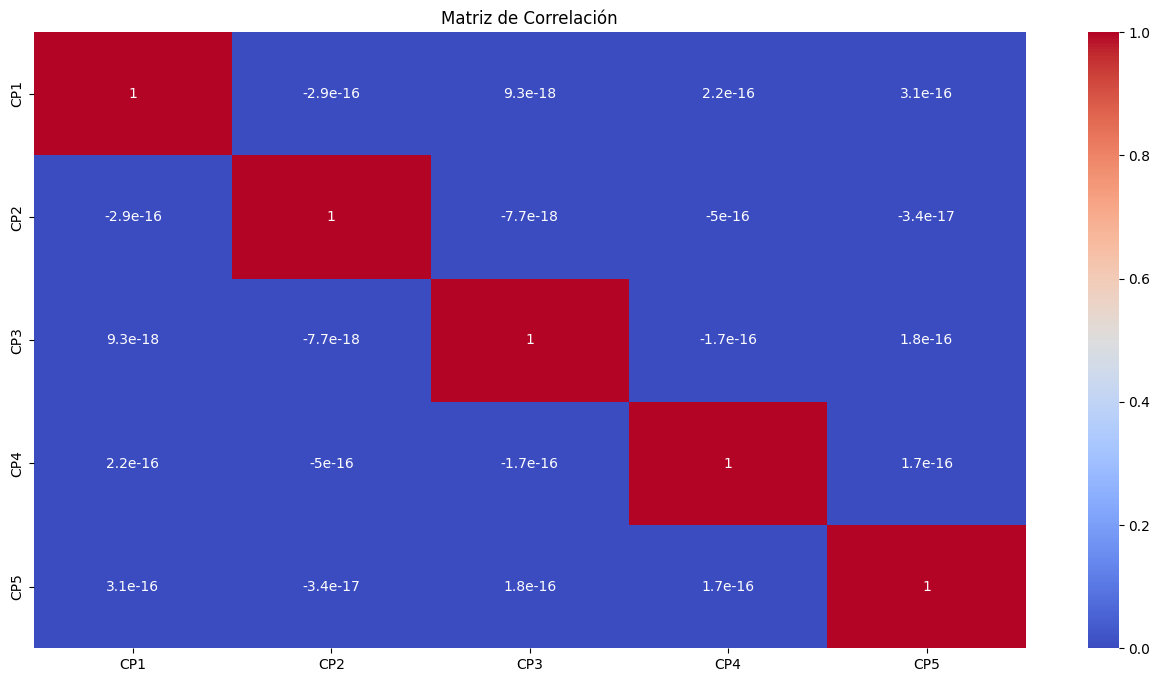

In [42]:
#Matriz de correlación
corr = X_std_pca.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

*Las componentes obtenidas por PCA son ortogonales, por lo que no presentan correlación entre sí, los valores cercanos a 0*

In [43]:
X_std_pca

,CP1,CP2,CP3,CP4,CP5
0,-1.689593,-3.218164,0.038098,-0.882270,-0.284471
1,-1.774018,-3.462002,0.036737,0.696561,-0.776844
2,-1.307163,-1.428625,0.021132,0.329686,-0.742613
3,1.009107,0.117322,1.588044,-0.735492,0.930906
4,-1.603161,-2.442747,0.178529,0.497434,0.158671
...,...,...,...,...,...
192,-1.116464,-2.328015,0.073085,0.616591,-0.474593
193,0.331256,3.485247,-0.358775,1.342404,-0.291567
194,0.370346,1.218483,-0.120185,0.458517,0.575167
195,-0.024416,2.143781,-0.352836,-1.857730,0.578321


AL FINAL

*Se discretizó el PIB en quintiles, generando una variable categórica que clasifica a los países según su nivel relativo de producción. Esta discretización facilita comparaciones y visualizaciones, manteniendo el valor numérico original para análisis posteriores.*

#Etapa Final: Implementación y Comparación de Modelos de Clasificación

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.
Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación.
Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.



In [44]:
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# Modelo de clasificación no supervisado base de datos sin PCA

In [45]:
# Importar bibliotecas principales
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Escalamiento y clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# Evaluación de número óptimo de clusters
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Métricas
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV, KFold

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [46]:
#@title Escalar dataset
escalado = StandardScaler()
data_escalada = escalado.fit_transform(df_rf_imputer)
df_data_escalada = pd.DataFrame(data_escalada, index = df_rf_imputer.index, columns = df_rf_imputer.columns)
df_data_escalada.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,NV.AGR.TOTL.CD,NV.AGR.TOTL.CN,NV.IND.MANF.CD,GE.EST,NV.IND.MANF.CN,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,-0.24,0.35,-0.16,-0.16,0.81,-0.16,-0.81,0.81,-0.21,-1.01,-0.09,0.28,1.01,-0.17,-0.10,-0.20,-1.24,-0.09,-0.22,-0.09,-0.27,-0.10,-0.11,-0.15,-0.14,-1.08,-1.54,-1.51,-1.50,-1.27,-0.04
1,-0.24,1.07,-0.13,-0.13,0.18,-0.13,-0.18,1.12,-0.17,-0.75,-0.08,0.95,0.75,-0.21,-0.10,-0.20,-0.70,-0.09,-0.22,-0.09,-0.27,-0.10,-0.11,-0.10,-0.14,-1.69,-1.03,-1.01,-0.98,-1.39,-1.98
2,-0.26,0.81,-0.24,-0.24,0.11,-0.23,-0.11,0.54,-0.23,1.09,-0.21,0.12,-1.09,-0.20,-0.10,-0.21,-1.28,-0.09,-0.24,-0.09,-0.28,-0.10,-0.11,-0.23,-0.15,-0.54,-0.64,-1.17,-1.58,-1.07,-0.13
3,0.17,-0.30,0.41,0.43,0.35,0.38,-0.35,0.27,0.19,-1.06,0.59,-0.24,1.06,0.29,0.88,0.08,0.14,0.91,0.07,0.77,-0.08,0.70,-0.15,0.05,0.32,0.85,0.43,0.16,-0.15,0.97,0.68
4,-0.27,0.77,-0.27,-0.27,-0.16,-0.26,0.16,0.36,-0.29,-1.76,-0.22,1.11,1.76,-0.21,0.04,-0.21,-0.60,-0.02,-0.24,-0.01,-0.29,0.03,-0.11,-0.21,-0.15,-1.37,-0.30,-0.28,-0.21,-1.23,-0.84


In [47]:
# Escalar dataset Min-Max
from sklearn.preprocessing import MinMaxScaler
escalado = MinMaxScaler()
data_min_max = escalado.fit_transform(df_rf_imputer)
data_min_max = pd.DataFrame(data_min_max, index = df_rf_imputer.index, columns = df_rf_imputer.columns)

In [48]:
#@title Instanciar modelos KMeans indicando k grupos
kmeans = KMeans(n_clusters = 3,
                random_state = 0,
                n_init='auto')

#Entrenar datos escalados
kmeans.fit(data_escalada)

KMeans(n_clusters=3, random_state=0)

In [49]:
#@title Obtener etiqueta de cluster
cluster = kmeans.labels_
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [50]:
# Crear copia de dataframe
df_kmeans = df_rf_imputer.copy()
df_kmeans['cluster'] = cluster

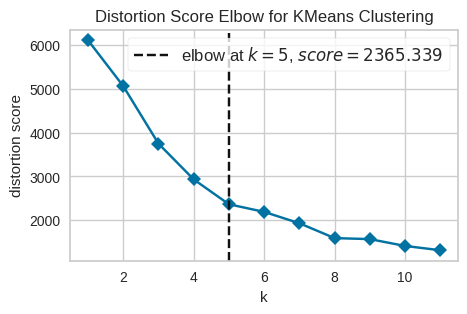

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
df_knn_op = df_data_escalada.copy()

# Instanciar modelo de agrupamiento
model = KMeans()

plt.figure(figsize=(5,3))

# Obtener métricas de acuerdo a k
visualizer = KElbowVisualizer(model, k=(1,12),
                              metric='distortion',
                              timings=False)

visualizer.fit(df_knn_op)
visualizer.show()


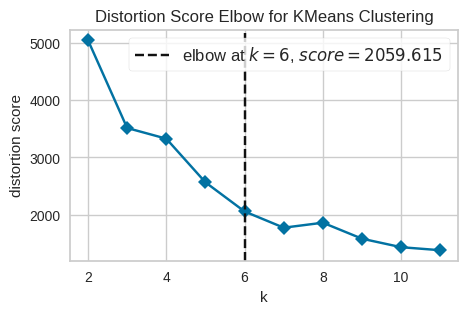

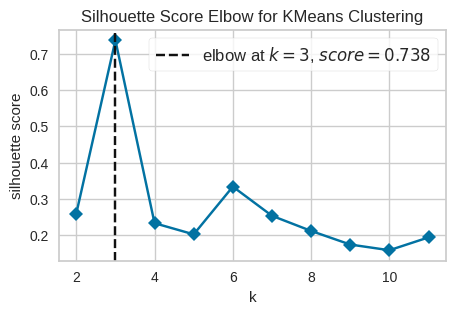

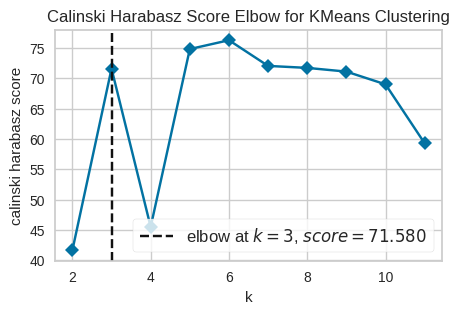

In [52]:
# Metricas de evalación
metricas = ['distortion','silhouette','calinski_harabasz']

# Selección k óptimo
for metrica in metricas:
  # Instanciar modelo de agrupamiento

  # Tamaño del gráfico
  plt.figure(figsize=(5, 3))
  # Obtener métricas de acuerdo a k
  visualizer = KElbowVisualizer(model, k=(2,12),
                                metric=metrica,
                                timings=False)

  # Ajustar los datos a la visualizador
  visualizer.fit(df_knn_op)
  visualizer.show();

In [53]:
X = data_escalada

param_grid = {
    'n_clusters': [2,3,4,5,6],
    'init': ['k-means++', 'random'],
    'n_init': [10,20,30,40]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

def silhouette_scorer_func(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

grid_search = GridSearchCV(
    estimator=KMeans(),
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer_func),
    cv=kf,
    verbose=1
)

grid_search.fit(X)

best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

print("Mejores hiperparámetros:", best_params)
print("Silhouette Score asociado:", silhouette_score(X, best_kmeans.labels_))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Mejores hiperparámetros: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Silhouette Score asociado: 0.7652169557417271


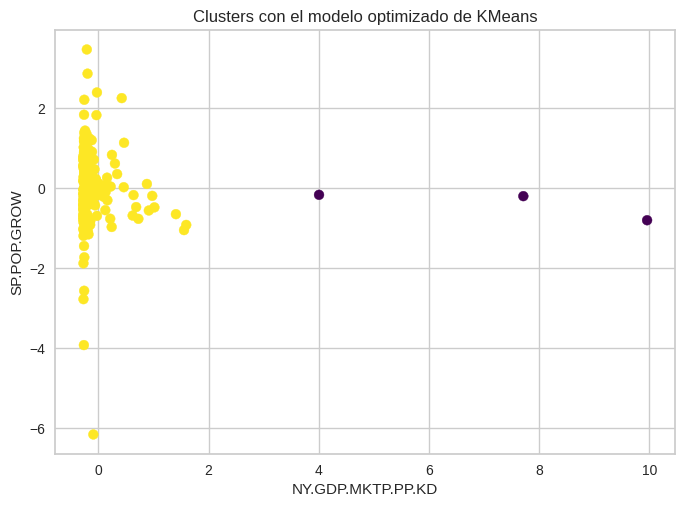

In [54]:
labels = best_kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clusters con el modelo optimizado de KMeans")
plt.xlabel(df_data_escalada.columns[0])
plt.ylabel(df_data_escalada.columns[1])
plt.show()

In [55]:
df_data_escalada['cluster'] = labels
df_data_escalada

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,NV.AGR.TOTL.CD,NV.AGR.TOTL.CN,NV.IND.MANF.CD,GE.EST,NV.IND.MANF.CN,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,cluster
0,-0.24,0.35,-0.16,-0.16,0.81,-0.16,-0.81,0.81,-0.21,-1.01,-0.09,0.28,1.01,-0.17,-0.10,-0.20,-1.24,-0.09,-0.22,-0.09,-0.27,-0.10,-0.11,-0.15,-0.14,-1.08,-1.54,-1.51,-1.50,-1.27,-0.04,1
1,-0.24,1.07,-0.13,-0.13,0.18,-0.13,-0.18,1.12,-0.17,-0.75,-0.08,0.95,0.75,-0.21,-0.10,-0.20,-0.70,-0.09,-0.22,-0.09,-0.27,-0.10,-0.11,-0.10,-0.14,-1.69,-1.03,-1.01,-0.98,-1.39,-1.98,1
2,-0.26,0.81,-0.24,-0.24,0.11,-0.23,-0.11,0.54,-0.23,1.09,-0.21,0.12,-1.09,-0.20,-0.10,-0.21,-1.28,-0.09,-0.24,-0.09,-0.28,-0.10,-0.11,-0.23,-0.15,-0.54,-0.64,-1.17,-1.58,-1.07,-0.13,1
3,0.17,-0.30,0.41,0.43,0.35,0.38,-0.35,0.27,0.19,-1.06,0.59,-0.24,1.06,0.29,0.88,0.08,0.14,0.91,0.07,0.77,-0.08,0.70,-0.15,0.05,0.32,0.85,0.43,0.16,-0.15,0.97,0.68,1
4,-0.27,0.77,-0.27,-0.27,-0.16,-0.26,0.16,0.36,-0.29,-1.76,-0.22,1.11,1.76,-0.21,0.04,-0.21,-0.60,-0.02,-0.24,-0.01,-0.29,0.03,-0.11,-0.21,-0.15,-1.37,-0.30,-0.28,-0.21,-1.23,-0.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-0.17,1.25,-0.02,-0.02,0.18,-0.03,-0.18,1.39,0.03,0.34,-0.08,0.14,-0.34,0.00,-0.08,-0.19,-1.07,-0.09,-0.17,-0.09,-0.24,-0.09,-0.11,-0.43,-0.14,-0.53,-1.24,-1.25,-1.24,-1.24,-0.10,1
193,-0.27,0.19,-0.27,-0.27,-0.37,-0.26,0.37,-0.12,-0.29,1.17,-0.22,0.35,-1.17,-0.21,-0.10,-0.21,1.57,-0.09,-0.24,-0.09,-0.29,-0.10,-0.11,0.29,-0.15,0.88,1.38,1.49,1.57,1.00,0.70,1
194,-0.05,0.24,0.04,0.04,-0.33,0.04,0.33,0.29,0.14,0.55,-0.07,-0.45,-0.55,0.11,-0.09,-0.15,-0.71,-0.09,-0.06,-0.09,-0.16,-0.09,-0.11,-0.24,0.00,0.87,0.22,0.39,0.56,0.98,0.70,1
195,-0.25,-1.72,-0.25,-0.26,0.20,-0.25,-0.20,-1.47,-0.27,-0.17,-0.21,-1.33,0.17,-0.18,-0.09,-0.21,0.27,-0.09,-0.23,-0.09,-0.28,-0.10,-0.11,0.26,-0.15,0.49,0.74,0.86,0.96,0.33,0.55,1


# Modelo de clasificación no supervisado base de datos
PCA

In [56]:
X_std_pca

,CP1,CP2,CP3,CP4,CP5
0,-1.69,-3.22,0.04,-0.88,-0.28
1,-1.77,-3.46,0.04,0.70,-0.78
2,-1.31,-1.43,0.02,0.33,-0.74
3,1.01,0.12,1.59,-0.74,0.93
4,-1.60,-2.44,0.18,0.50,0.16
...,...,...,...,...,...
192,-1.12,-2.33,0.07,0.62,-0.47
193,0.33,3.49,-0.36,1.34,-0.29
194,0.37,1.22,-0.12,0.46,0.58
195,-0.02,2.14,-0.35,-1.86,0.58


In [57]:
#@title Escalar dataset
escalado = StandardScaler()
data_escalada = escalado.fit_transform(X_std_pca)
df_data_escalada = pd.DataFrame(data_escalada, index = X_std_pca.index, columns = X_std_pca.columns)
df_data_escalada.head()

,CP1,CP2,CP3,CP4,CP5
0,-0.56,-1.24,0.02,-0.51,-0.23
1,-0.59,-1.33,0.02,0.40,-0.63
2,-0.43,-0.55,0.01,0.19,-0.60
3,0.33,0.05,0.79,-0.42,0.75
4,-0.53,-0.94,0.09,0.29,0.13


In [58]:
# Escalar dataset Min-Max
from sklearn.preprocessing import MinMaxScaler
escalado = MinMaxScaler()
data_min_max = escalado.fit_transform(X_std_pca)
data_min_max = pd.DataFrame(data_min_max, index = X_std_pca.index, columns = X_std_pca.columns)

In [59]:
#@title Instanciar modelos KMeans indicando k grupos
kmeans = KMeans(n_clusters = 3,
                random_state = 0,
                n_init='auto')

#Entrenar datos escalados
kmeans.fit(data_escalada)

KMeans(n_clusters=3, random_state=0)

In [60]:
#@title Obtener etiqueta de cluster
cluster = kmeans.labels_
cluster

array([2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2],
      dtype=int32)

In [61]:
# Crear copia de dataframe
df_kmeans = df_rf_imputer.copy()
df_kmeans['cluster'] = cluster

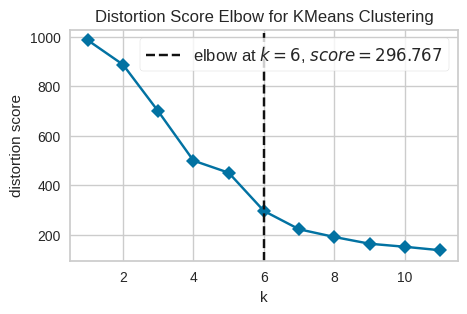

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
df_knn_op = df_data_escalada.copy()

# Instanciar modelo de agrupamiento
model = KMeans()

# Tamaño del gráfico
plt.figure(figsize=(5,3))

# Obtener métricas de acuerdo a k
visualizer = KElbowVisualizer(model, k=(1,12),
                              metric='distortion',
                              timings=False)

# Ajustar los datos a la visualizador
visualizer.fit(df_knn_op)
visualizer.show()


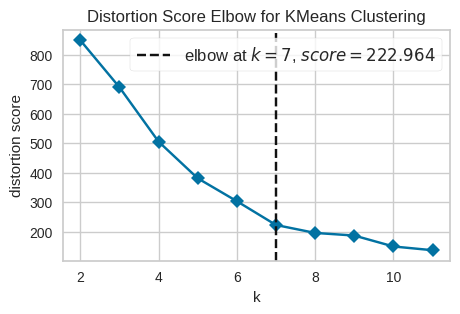

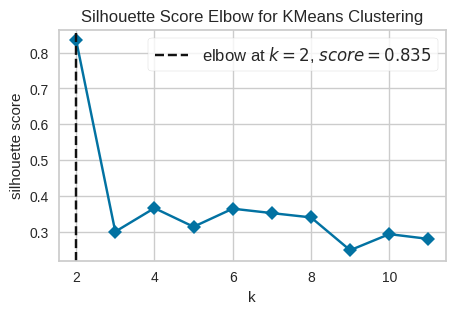

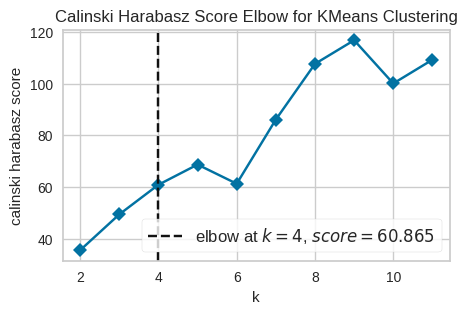

In [63]:
# Metricas de evalación
metricas = ['distortion','silhouette','calinski_harabasz']

# Selección k óptimo
for metrica in metricas:
  # Instanciar modelo de agrupamiento

  # Tamaño del gráfico
  plt.figure(figsize=(5, 3))
  # Obtener métricas de acuerdo a k
  visualizer = KElbowVisualizer(model, k=(2,12),
                                metric=metrica,
                                timings=False)

  # Ajustar los datos a la visualizador
  visualizer.fit(df_knn_op)
  visualizer.show();

In [64]:
X = data_escalada

param_grid = {
    'n_clusters': [2,3,4,5,6],
    'init': ['k-means++', 'random'],
    'n_init': [10,20,30,40]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

def silhouette_scorer_func(estimator, X):
    labels_temp = estimator.fit_predict(X) # Use a temporary variable for labels within the function
    return silhouette_score(X, labels_temp)

grid_search = GridSearchCV(
    estimator=KMeans(),
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer_func),
    cv=kf,
    verbose=1
)

grid_search.fit(X)

best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

# Rename labels to avoid conflict
pca_cluster_labels = best_kmeans.predict(X)

print("Mejores hiperparámetros:", best_params)
print("Silhouette Score asociado:", silhouette_score(X, pca_cluster_labels))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Mejores hiperparámetros: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Silhouette Score asociado: 0.8347451477156103


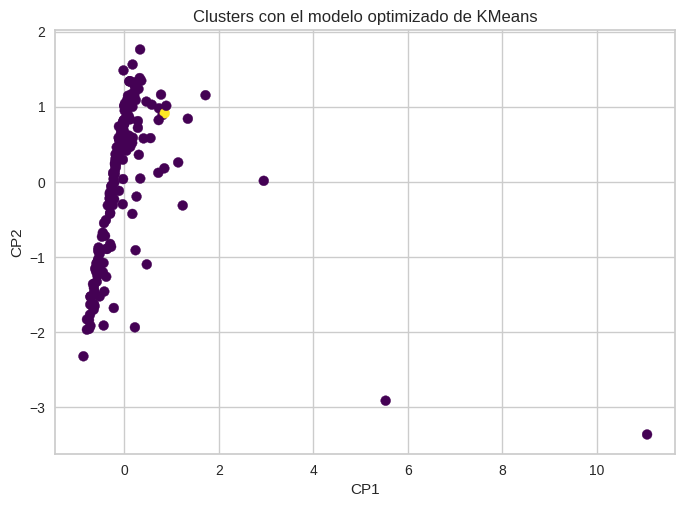

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=pca_cluster_labels, cmap='viridis', s=50)
plt.title("Clusters con el modelo optimizado de KMeans")
plt.xlabel(df_data_escalada.columns[0])
plt.ylabel(df_data_escalada.columns[1])
plt.show()

In [66]:
df_data_escalada['cluster'] = pca_cluster_labels
df_data_escalada

,CP1,CP2,CP3,CP4,CP5,cluster
0,-0.56,-1.24,0.02,-0.51,-0.23,0
1,-0.59,-1.33,0.02,0.40,-0.63,0
2,-0.43,-0.55,0.01,0.19,-0.60,0
3,0.33,0.05,0.79,-0.42,0.75,0
4,-0.53,-0.94,0.09,0.29,0.13,0
...,...,...,...,...,...,...
192,-0.37,-0.89,0.04,0.36,-0.38,0
193,0.11,1.34,-0.18,0.78,-0.24,0
194,0.12,0.47,-0.06,0.26,0.46,0
195,-0.01,0.82,-0.18,-1.07,0.47,0


# Modelo de clasificación supervisado base de datos SIN PCA

In [67]:
df1=df_rf_imputer.copy()

In [68]:
df1['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_rf_imputer['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [69]:
y = df1['NY.GDP.MKTP.PP.KD']
X = df1.drop(columns='NY.GDP.MKTP.PP.KD')

In [70]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [71]:
# Estandarizar datos
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [72]:
#@title Instanciar algoritmo de clasificación RFC
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)


In [73]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

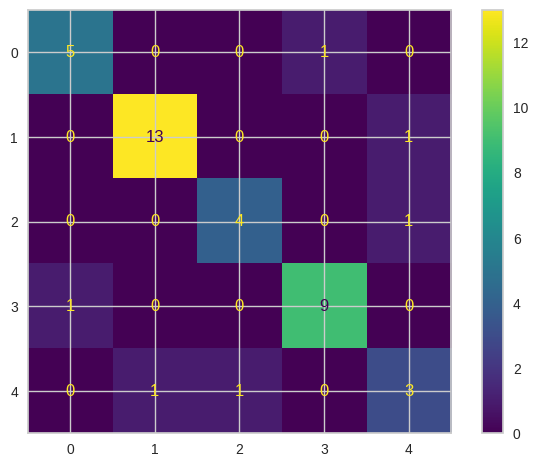

In [75]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()
plt.show()

In [76]:
#@title Mostrar Reporte
SupervisadoAntiguo = classification_report(y_test, y_pred_rfc, output_dict=True)
SupervisadoAntiguo = pd.DataFrame(SupervisadoAntiguo).transpose()
SupervisadoAntiguo

,precision,recall,f1-score,support
High,0.83,0.83,0.83,6.00
Low,0.93,0.93,0.93,14.00
Medium,0.80,0.80,0.80,5.00
Medium-High,0.90,0.90,0.90,10.00
Medium-Low,0.60,0.60,0.60,5.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.81,0.81,0.81,40.00
weighted avg,0.85,0.85,0.85,40.00


# Modelo de clasificación supervisado base de datos PCA

In [77]:
y = df1['NY.GDP.MKTP.PP.KD']
X = X_std_pca

In [78]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [79]:
# Estandarizar datos
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [80]:
#@title Instanciar algoritmo de clasificación RFC
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)


In [81]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

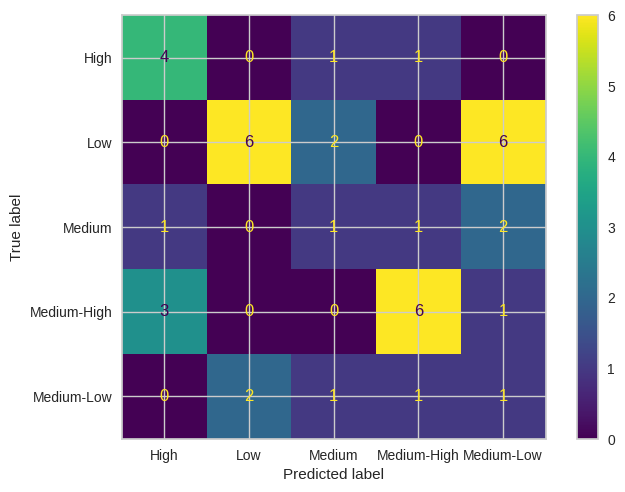

In [82]:
import numpy as np
labels = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred_rfc, labels=labels)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.show()


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

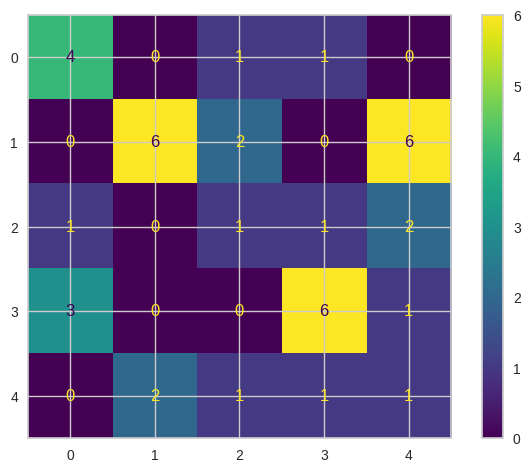

In [83]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()
plt.show()

In [86]:
#@title Mostrar Reporte
SupervisadoPCA = classification_report(y_test, y_pred_rfc, output_dict=True)
SupervisadoPCA = pd.DataFrame(SupervisadoPCA).transpose()
SupervisadoPCA

,precision,recall,f1-score,support
High,0.50,0.67,0.57,6.00
Low,0.75,0.43,0.55,14.00
Medium,0.20,0.20,0.20,5.00
Medium-High,0.67,0.60,0.63,10.00
Medium-Low,0.10,0.20,0.13,5.00
accuracy,0.45,0.45,0.45,0.45
macro avg,0.44,0.42,0.42,40.00
weighted avg,0.54,0.45,0.48,40.00


In [87]:
print("Reporte Supervisado Antiguo")
print(SupervisadoAntiguo)
print("-----------------------------------------------------")
print("Reporte Supervisado PCA")
print(SupervisadoPCA)

Reporte Supervisado Antiguo
              precision  recall  f1-score  support
High               0.83    0.83      0.83     6.00
Low                0.93    0.93      0.93    14.00
Medium             0.80    0.80      0.80     5.00
Medium-High        0.90    0.90      0.90    10.00
Medium-Low         0.60    0.60      0.60     5.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.81    0.81      0.81    40.00
weighted avg       0.85    0.85      0.85    40.00
-----------------------------------------------------
Reporte Supervisado PCA
              precision  recall  f1-score  support
High               0.50    0.67      0.57     6.00
Low                0.75    0.43      0.55    14.00
Medium             0.20    0.20      0.20     5.00
Medium-High        0.67    0.60      0.63    10.00
Medium-Low         0.10    0.20      0.13     5.00
accuracy           0.45    0.45      0.45     0.45
macro avg          0.44    0.42      0.42    40.00
weighted avg       0.54    